In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import lattpy as lp
from lattpy import plotting

In [2]:
WIDTH = 2.584 * 2
plt.style.use(['./thesis.mplstyle', "science", "grid", "muted"])

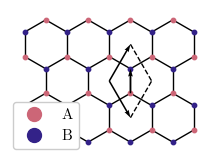

In [3]:
a_0 = 1
a = np.sqrt(3) * a_0

graphene_A = lp.Atom("A", radius=0.09)
graphene_B = lp.Atom("B", radius=0.09)

basis = 0.5 * a * np.array([[1, np.sqrt(3)],
                  [1, -np.sqrt(3)]])

latt = lp.Lattice(basis)


latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3)], graphene_A)
latt.add_atom([0.5 * a, 0.5 * a / np.sqrt(3)], graphene_B)
latt.add_connection(graphene_A, graphene_B, analyze=True)

structure = latt.build((7, 6))

#ax = latt.plot(show_indices=True)

fig, ax = plt.subplots(figsize=(WIDTH / 2, WIDTH / 2))

ax = latt.plot(ax=ax)

ax.legend(loc='lower left')

lp.plotting.hide_box(ax, axis=True)

lp.plotting.draw_arrows(ax, basis[0], pos=latt.center())
lp.plotting.draw_arrows(ax, basis[1], pos=latt.center())

lp.plotting.draw_vectors(ax, [basis[0][0], -basis[0][1]], pos=latt.center() + basis[0], linestyle='dashed', color='k')
lp.plotting.draw_vectors(ax, [basis[1][0], -basis[1][1]], pos=latt.center() + basis[1], linestyle='dashed', color='k')

arrow_1 = lp.plotting.draw_arrows(ax, [0, a / np.sqrt(3)], pos=latt.position(21), linewidth=2000)

fig.savefig('graphene lattice.pgf')
#plt.close(fig)

In [4]:
reciprocal_lattice = latt.reciprocal_lattice()

basis = reciprocal_lattice.vectors

bz = reciprocal_lattice.wigner_seitz_cell()

fig, ax = plt.subplots(figsize=(WIDTH / 2, WIDTH / 2))

ax = bz.draw(color='black', ax=ax)

lp.plotting.draw_arrows(ax, basis[0])
lp.plotting.draw_arrows(ax, basis[1])
#ax.annotate('$\mathbf{b}_1$', basis[0])

Gamma = bz.symmetry_points()[0]
M = bz.symmetry_points()[2][5]
K = bz.symmetry_points()[1][4]

lp.plotting.draw_points(ax, Gamma, color='black')
lp.plotting.draw_points(ax, M, color='black')
lp.plotting.draw_points(ax, K, color='black')

lp.plotting.draw_line(ax, np.array([Gamma, M, K, Gamma]), color='black')

ax.annotate('$\Gamma$', (Gamma[0], Gamma[1]), xytext=(2, 10), textcoords='offset points', fontsize='large')
ax.annotate('$\mathrm{M}$', (M[0], M[1]), xytext=(0, 12), textcoords='offset points', fontsize='large')
ax.annotate('$\mathrm{K}$', (K[0], K[1]), xytext=(0, 12), textcoords='offset points', fontsize='large')

lp.plotting.hide_box(ax, axis=True)

fig.savefig('graphene brillouin_zone.pgf')
plt.close(fig)

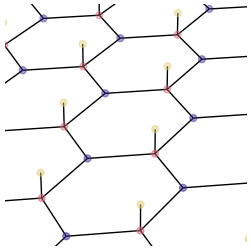

In [5]:
a_0 = 1
a = np.sqrt(3) * a_0

graphene_A = lp.Atom("A", radius=0.1)
graphene_B = lp.Atom("B", radius=0.1)
x_atom = lp.Atom("X", radius=0.1)

basis = 0.5 * a * np.array([[1, np.sqrt(3), 0],
                            [1, -np.sqrt(3), 0],
                            [0, 0, 1]])

latt = lp.Lattice(basis)

latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3), 0], graphene_A)
latt.add_atom([0.5 * a, 0.5 * a / np.sqrt(3), 0], graphene_B)
latt.add_atom([0.5 * a, -0.5 * a / np.sqrt(3), 0.25 * a], x_atom)
latt.add_connection(graphene_A, graphene_B, analyze=True)
latt.add_connection(graphene_A, x_atom, analyze=True)

structure = latt.build((20, 20, 0.8))

fig, ax = plt.subplots(figsize=(WIDTH, WIDTH), subplot_kw={"projection": "3d"})

ax = latt.plot(ax=ax, legend=False, adjustable=None)

fig.set_size_inches((WIDTH, WIDTH / 2))

lp.plotting.hide_box(ax, axis=True)

# Hide everything else
# Hide axes ticks
#ax.set_xticks([])
#ax.set_yticks([])
#ax.set_zticks([])
# make the panes transparent
#ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
#ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Hide box axes
ax._axis3don = False

# Expand to remove white space
ax.set_xlim(np.array([6.5, 8.9]))
ax.set_ylim(np.array([7.1, 8.9]))
ax.set_zlim(np.array([0, 1.7]))

fig.savefig('dressed graphene lattice.pgf')
#plt.close(fig)